<a href="https://colab.research.google.com/github/clferreira1985/Python/blob/main/SVM_estudo_de_caso/SVM_estudo_de_caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **1º Problema de Negócio**

Usando SVM para prever a intenção de compra de usuários de e-commerce
Querendo saber se o cliente está ou não propenso a comprar produtos no seu site, para que o departamento de Marketing faça campanhas de vendas direcionadas a esses clientes.

**Fonte**
https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset

#### **2º Análise Exploratória dos Dados**

In [55]:
# Imports 
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carrengando os dados
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Shape
df.shape

(12330, 18)

In [4]:
# Tipos de dados
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
# verificar valores missing
print(df.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [6]:
# removendo as linhas com valores missing
df.dropna(inplace = True)

In [7]:
print(df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [8]:
df.shape

(12316, 18)

In [9]:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

####Dividir os dados Variáves categóricas e contínuas

#### OBS.: foi observado que as colunas com menos de 30 valores distintos são categóricas

In [10]:
# preparando os dados para o plot 
df_copy = df.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
  if df_copy.nunique()[c] >= 30:
    continuous.append(c)
  else:
     categorical.append(c) 

In [11]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [12]:
df_copy[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [13]:
df_copy[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


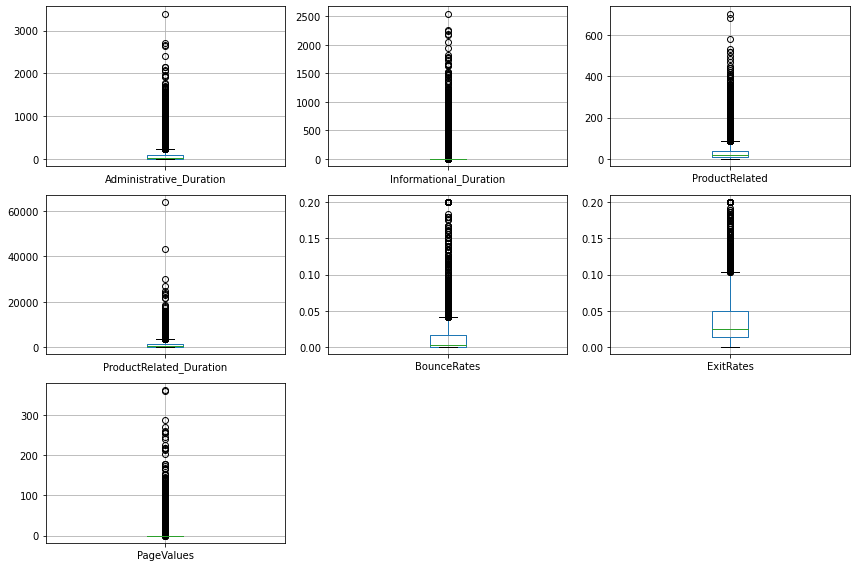

In [14]:
# Plot das variáveis continuas

# Tamanho da plotagem

fig = plt.figure(figsize = (12,8))
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1)
  df_copy.boxplot(col);
  plt.tight_layout()

plt.show()


Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar transformação de log para melhor visualização.

In [ ]:
# Transformação de log nas variáveis contínuas
df_copy[continuous] = np.log1p(1 + df_copy[continuous])

In [ ]:
fig = plt.figure(figsize = (12,8))
for i, col in enumerate(continuous):
  plt.subplot(3, 3, i + 1)
  df_copy.boxplot(col);
  plt.tight_layout()

plt.show()

Matriz de correlação entre variáveis contínuas



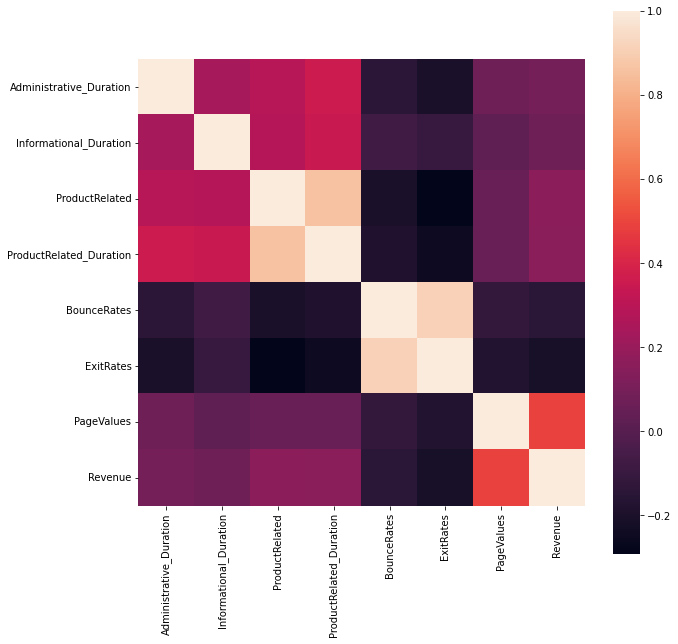

In [15]:
plt.figure(figsize = (10, 10))

sns.heatmap(df_copy[['Administrative_Duration',
                      'Informational_Duration',
                      'ProductRelated',
                      'ProductRelated_Duration',
                      'BounceRates',
                      'ExitRates',
                      'PageValues',
                      'Revenue']].corr(), vmax = 1, square = True)


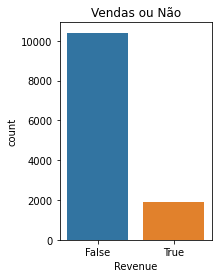

In [16]:
# Countplot vendas ou não
plt.subplot(1, 2, 2)
plt.title('Vendas ou Não')
sns.countplot(df_copy['Revenue'])

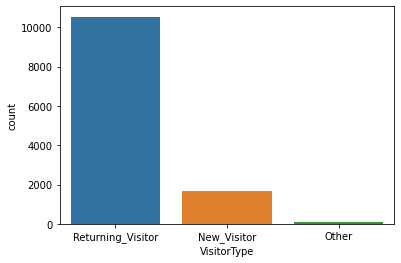

In [17]:
# Countplot Tipo de visitante
plt.xlabel("Tipo de Visitante")
sns.countplot(df_copy['VisitorType'])

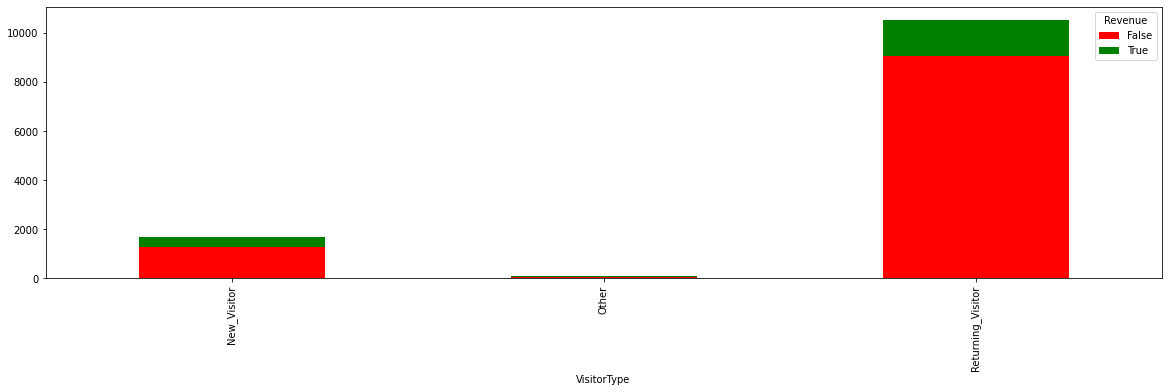

In [18]:
#Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(df_copy['VisitorType'], df_copy['Revenue']).plot(kind = 'bar',
                                                             stacked = True,
                                                             figsize = (20, 5),
                                                             color = ['red','green'])

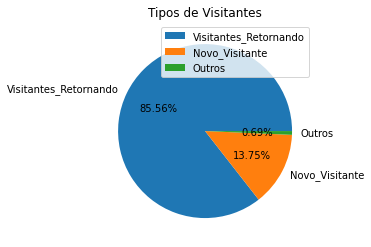

In [19]:
# Pie Chart Tipos de visitantes 
labels = ['Visitantes_Retornando', 'Novo_Visitante', 'Outros']
plt.title('Tipos de Visitantes')
plt.pie(df_copy['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

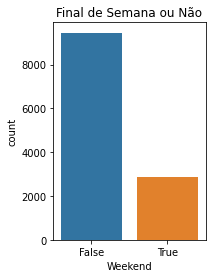

In [20]:
# Countplot Final de Semana ou Não
plt.subplot(1, 2, 1)
plt.title("Final de Semana ou Não")
sns.countplot(df_copy['Weekend'])

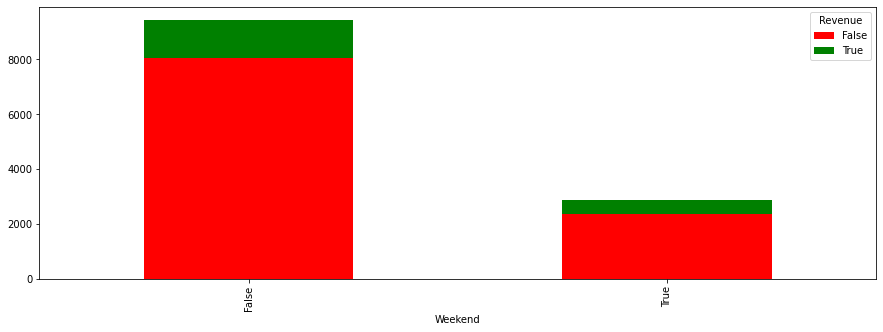

In [21]:
# Stacked Bar Final de Semana x Revenue
pd.crosstab(df_copy["Weekend"], df_copy['Revenue']).plot(kind='bar',
                                                         stacked = True,
                                                         figsize = (15, 5),
                                                         color = ['red','green'])

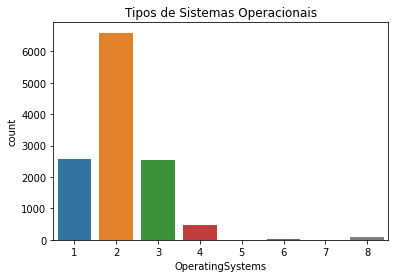

In [22]:
# Countplot Tipos de sistemas Operacionais
#plt.figure(figsize = (15,6))
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel('Sistema Operacional Usado')
sns.countplot(df_copy['OperatingSystems'])

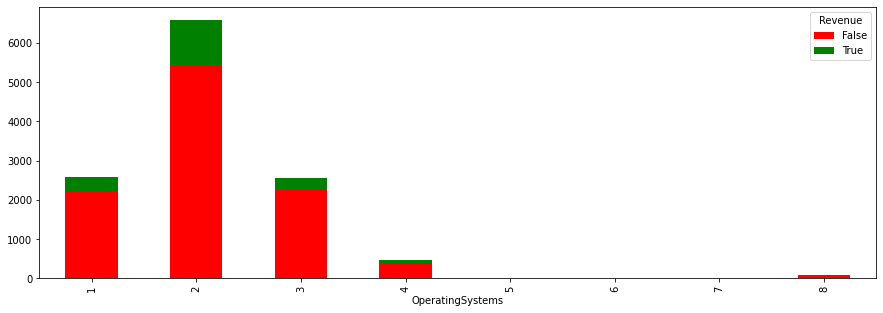

In [23]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(df_copy["OperatingSystems"], df_copy['Revenue']).plot(kind='bar',
                                                         stacked = True,
                                                         figsize = (15, 5),
                                                         color = ['red','green'])

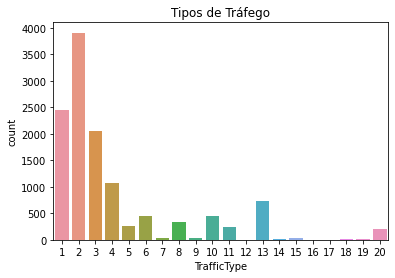

In [24]:
# Countplot Tipo de Tráfego
plt.title("Tipos de Tráfego")
plt.xlabel('Tipos de Tráfego')
sns.countplot(df_copy['TrafficType'])

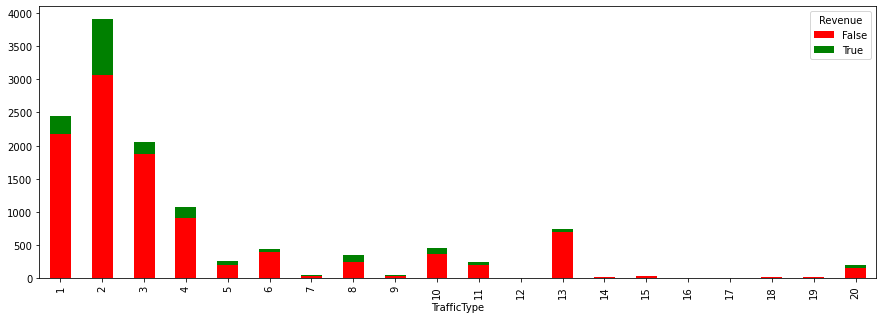

In [25]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(df_copy["TrafficType"], df_copy['Revenue']).plot(kind='bar',
                                                         stacked = True,
                                                         figsize = (15, 5),
                                                         color = ['red','green'])

#### **3º Pré-Processamento dos dados**

In [26]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [27]:
# Criar o enconder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df['Month'] = lb.fit_transform(df['Month'])
df['VisitorType'] = lb.fit_transform(df['VisitorType'])


In [28]:
df.dropna(inplace=True)

In [29]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [30]:
df.shape

(12316, 18)

In [31]:
# Verificando se a variável resposta está balanceada
target_count = df.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

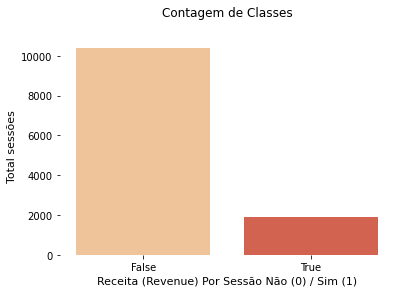

In [32]:
# Plot
sns.countplot(df.Revenue, palette = 'OrRd')
plt.box(False)
plt.xlabel ('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [33]:

#instala e import o pacote imblear - importante para fazer o balanceamento das variáveis
!pip install -q imblearn
import imblearn

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
# Seed para reduzir o mesmo resultado
seed = 7

# Separa X e y
X = df.iloc[:, 0:17]
y = df.iloc[:,17]


In [36]:
# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

X_res, y_res = smote_bal.fit_resample(X,y)

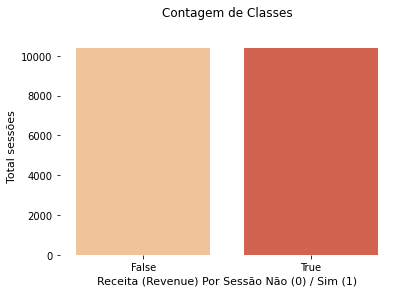

In [40]:
sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel ('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [41]:
df.shape  

(12316, 18)

In [42]:
X_res.shape

(20816, 17)

In [48]:
# Ajustando x e y

X = X_res
y = y_res

In [49]:
# Divisão em Dados de Treino e Teste

X_treino, X_teste, y_treino, x_teste = train_test_split(X, y, test_size = 0.3, random_state = 7)

#### **4º Construção da Máquina preditiva**

Modelo Baseline com Kernel Linear e dados Padronizados
  

In [51]:
# Padronização

sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [52]:
x_treino_scaled

array([[-0.80303007, -0.51680125, -0.45353474, ..., -0.50153323,
         0.53871194, -0.68786439],
       [-0.80303007, -0.51680125, -0.45353474, ..., -0.77458064,
         0.53871194, -0.68786439],
       [-0.80303007, -0.51680125, -0.45353474, ...,  0.04456158,
         0.53871194, -0.68786439],
       ...,
       [-0.21032297, -0.12987474, -0.45353474, ..., -0.77458064,
         0.53871194, -0.68786439],
       [ 0.08603057,  0.42242722, -0.45353474, ...,  2.50198822,
         0.53871194,  1.45377493],
       [-0.55838702, -0.44893751, -0.45353474, ..., -0.22848583,
        -0.76955001, -0.68786439]])

In [53]:
X_teste_scaled

array([[-0.80303007, -0.51680125, -0.45353474, ..., -0.22848583,
         0.53871194, -0.68786439],
       [ 0.97509122,  0.56145127, -0.45353474, ...,  1.1367512 ,
        -0.76955001,  1.45377493],
       [ 3.92147509,  1.23931648,  1.37239564, ...,  0.86370379,
         0.53871194,  1.45377493],
       ...,
       [ 1.31730335,  0.06876298, -0.45353474, ..., -0.77458064,
         0.53871194, -0.68786439],
       [-0.80303007, -0.51680125, -0.45353474, ..., -0.22848583,
         0.53871194, -0.68786439],
       [-0.50667652, -0.39513314, -0.45353474, ..., -0.22848583,
         0.53871194, -0.68786439]])

In [56]:
# Cria o modelo

modelo_v1 = svm.CVC(kernel = 'linear')

AttributeError: ignored

#### **5º Avaliação da Máquina preditiva**